In [1]:
 import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50, InceptionV3
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from sklearn.utils import class_weight
from keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import numpy as np
from PIL import Image
from keras.preprocessing.image import img_to_array, load_img
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import sobel
from skimage.filters import scharr

In [3]:
data_dir = 'D:/DataSet/Herlev Dataset/train'
datagen = ImageDataGenerator(validation_split=0.2, rescale=1./255)
train_generator = datagen.flow_from_directory(data_dir, target_size=(128, 128), batch_size=32, class_mode='categorical', subset='training')
val_generator = datagen.flow_from_directory(data_dir, target_size=(128, 128), batch_size=32, class_mode='categorical', subset='validation')

Found 518 images belonging to 7 classes.
Found 125 images belonging to 7 classes.


In [5]:
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(train_generator.classes), y=train_generator.classes)
class_weights = {i : class_weights[i] for i in range(len(class_weights))}

In [7]:
class_weights

{0: 0.8809523809523809,
 1: 0.7184466019417476,
 2: 0.891566265060241,
 3: 1.3214285714285714,
 4: 1.85,
 5: 1.8048780487804879,
 6: 0.6666666666666666}

Found 643 images belonging to 7 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.25289825..1.1720711].


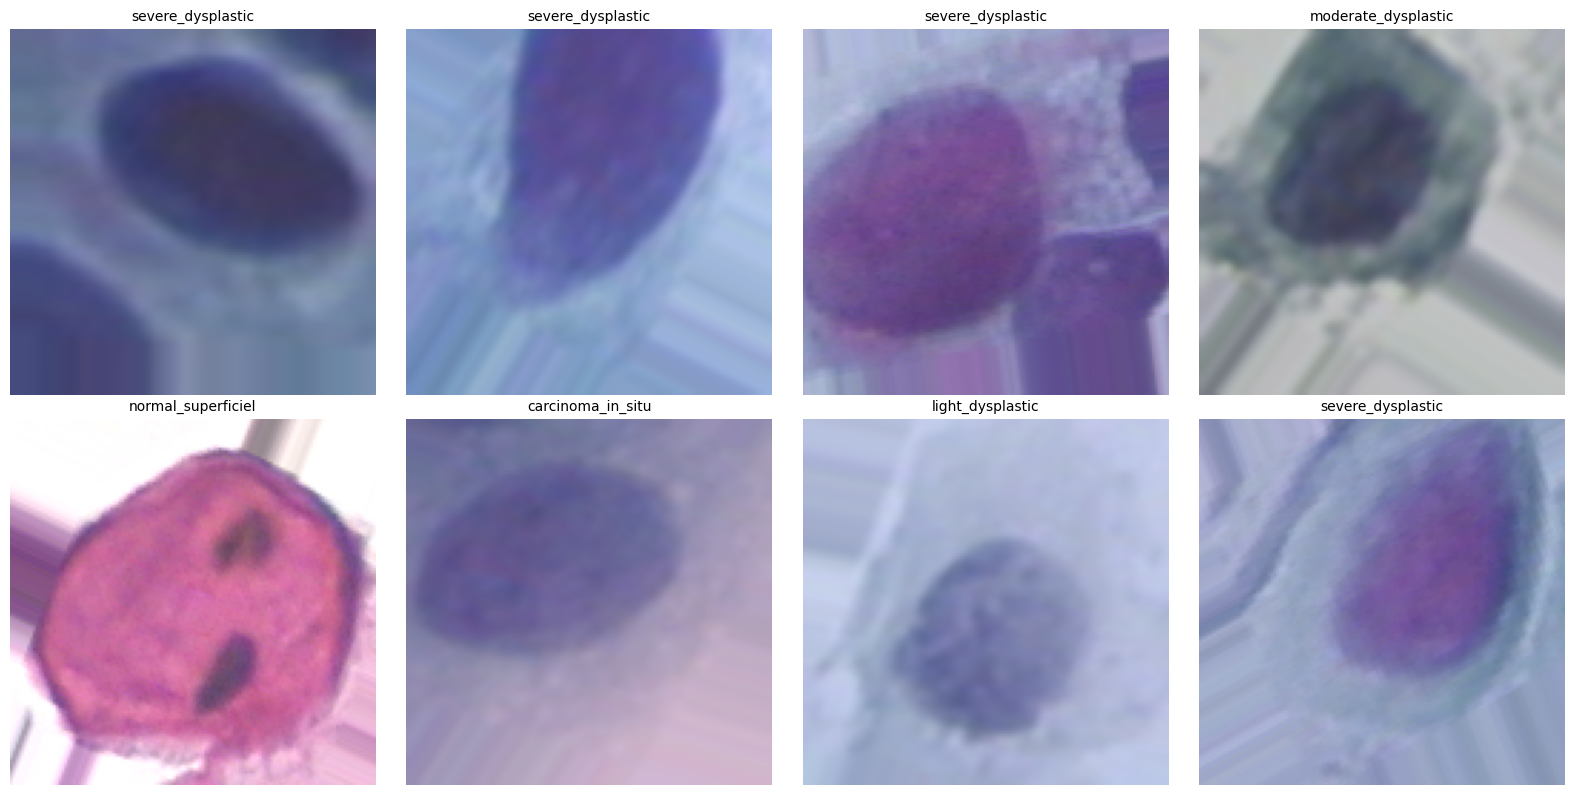

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from imgaug import augmenters as iaa

# Function for custom augmentation (Gaussian blur, Linear contrast, etc.)
def custom_augment(image):
    # Convert to numpy array
    image = np.array(image)
    
    # Gaussian Blur
    if np.random.rand() > 0.5:  # Apply with 50% probability
        image = cv2.GaussianBlur(image, (5, 5), 0)
    
    # Linear Contrast
    if np.random.rand() > 0.5:  # Apply with 50% probability
        contrast = iaa.LinearContrast((0.75, 1.5))  # Random contrast adjustment
        image = contrast.augment_image(image)

    return image

# Define the ImageDataGenerator with standard augmentations
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,      # Random rotations
    width_shift_range=0.2,  # Horizontal shifts
    height_shift_range=0.2,  # Vertical shifts
    shear_range=20,         # Shear transformation
    zoom_range=0.2,         # Random zoom
    horizontal_flip=True,   # Horizontal flip
    fill_mode='nearest'     # Filling strategy for new pixels
)

# Example: Custom augmentation for one batch
def augment_and_display(data_dir):
    # Load and augment images
    generator = datagen.flow_from_directory(
        data_dir,
        target_size=(128, 128),  # Resize images
        batch_size=8,           # Generate 8 images for visualization
        class_mode='categorical'  # Include labels
    )
    
    # Get one batch of images and labels
    images, labels = next(generator)
    augmented_images = [custom_augment(img) for img in images]
    
    # Get class labels
    class_indices = generator.class_indices
    label_map = {v: k for k, v in class_indices.items()}  # Map indices to class names
    label_names = [label_map[np.argmax(lbl)] for lbl in labels]
    
    # Plot original and augmented images with labels
    fig, axes = plt.subplots(2, 4, figsize=(16, 8))
    axes = axes.flatten()
    for img, label, ax in zip(augmented_images, label_names, axes):
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(label, fontsize=10)  # Set label as title
    plt.tight_layout()
    plt.show()

# Replace 'data_dir' with the path to your dataset
augment_and_display("D:/DataSet/Herlev Dataset/train")


Found 643 images belonging to 7 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.21574382..1.0840926].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.3186393..1.1291262].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.30894083..1.1724837].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.26585588..1.0176895].


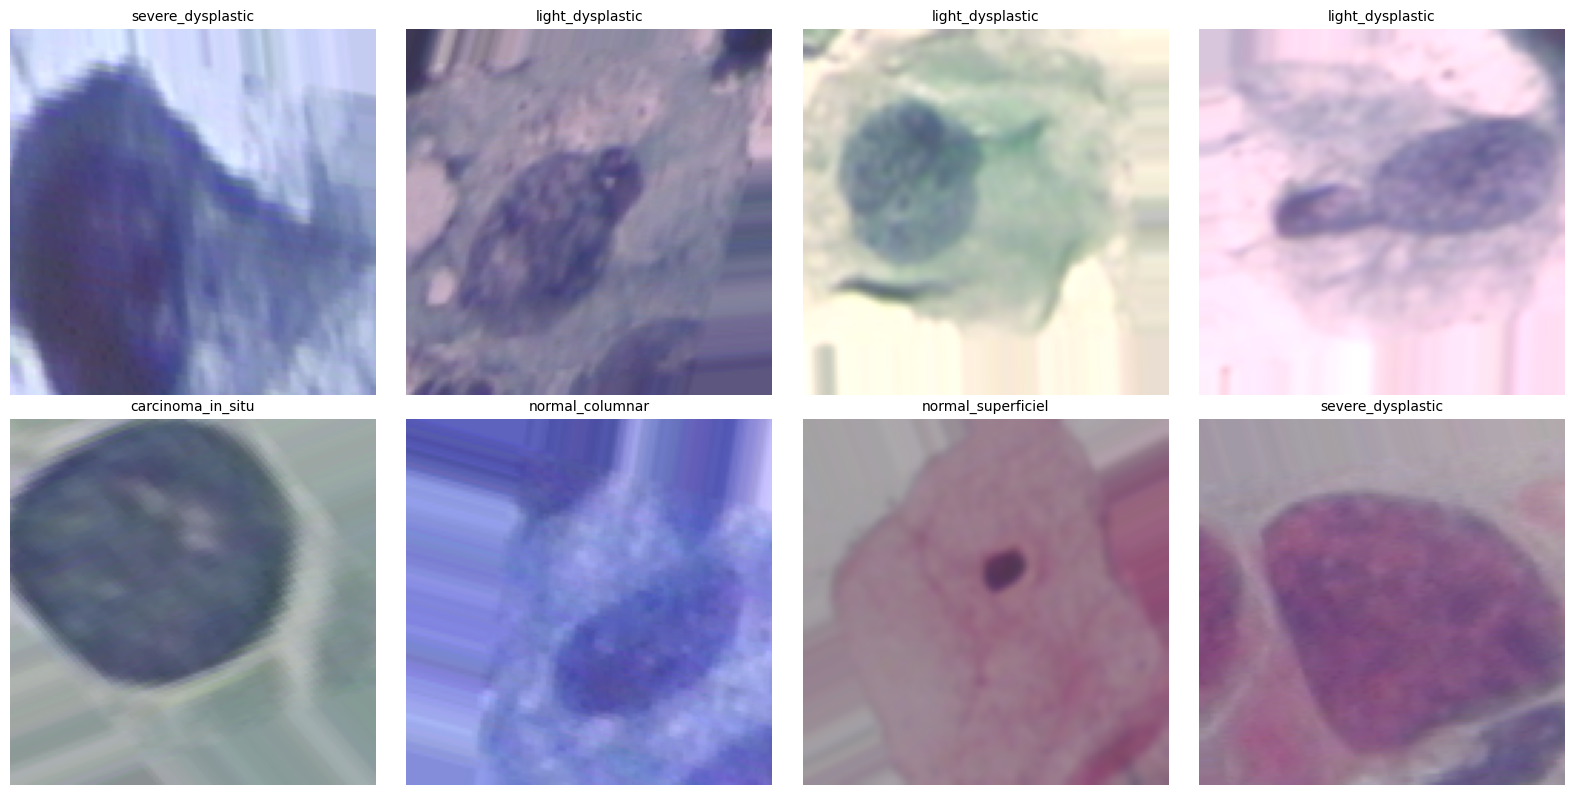

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from imgaug import augmenters as iaa

# Function for custom augmentation (Gaussian blur, Linear contrast, etc.)
def custom_augment(image):
    # Convert to numpy array
    image = np.array(image)
    
    # Gaussian Blur
    if np.random.rand() > 0.5:  # Apply with 50% probability
        image = cv2.GaussianBlur(image, (5, 5), 0)
    
    # Linear Contrast
    if np.random.rand() > 0.5:  # Apply with 50% probability
        contrast = iaa.LinearContrast((0.75, 1.5))  # Random contrast adjustment
        image = contrast.augment_image(image)

    return image

# Define the ImageDataGenerator with standard augmentations
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,      # Random rotations
    width_shift_range=0.2,  # Horizontal shifts
    height_shift_range=0.2,  # Vertical shifts
    shear_range=20,         # Shear transformation
    zoom_range=0.2,         # Random zoom
    horizontal_flip=True,   # Horizontal flip
    fill_mode='nearest'     # Filling strategy for new pixels
)

# Example: Custom augmentation for one batch
def augment_and_display(data_dir):
    # Load and augment images
    generator = datagen.flow_from_directory(
        data_dir,
        target_size=(128, 128),  # Resize images
        batch_size=8,           # Generate 8 images for visualization
        class_mode='categorical'  # Include labels
    )
    
    # Get one batch of images and labels
    images, labels = next(generator)
    augmented_images = [custom_augment(img) for img in images]
    
    # Get class labels
    class_indices = generator.class_indices
    label_map = {v: k for k, v in class_indices.items()}  # Map indices to class names
    label_names = [label_map[np.argmax(lbl)] for lbl in labels]
    
    # Plot original and augmented images with labels
    fig, axes = plt.subplots(2, 4, figsize=(16, 8))
    axes = axes.flatten()
    for img, label, ax in zip(augmented_images, label_names, axes):
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(label, fontsize=10)  # Set label as title
    plt.tight_layout()
    plt.show()

# Replace 'data_dir' with the path to your dataset
augment_and_display("D:/DataSet/Herlev Dataset/train")


Loading image from: D:/DataSet/Herlev Dataset/train/light_dysplastic\148494967-148494986-001.BMP


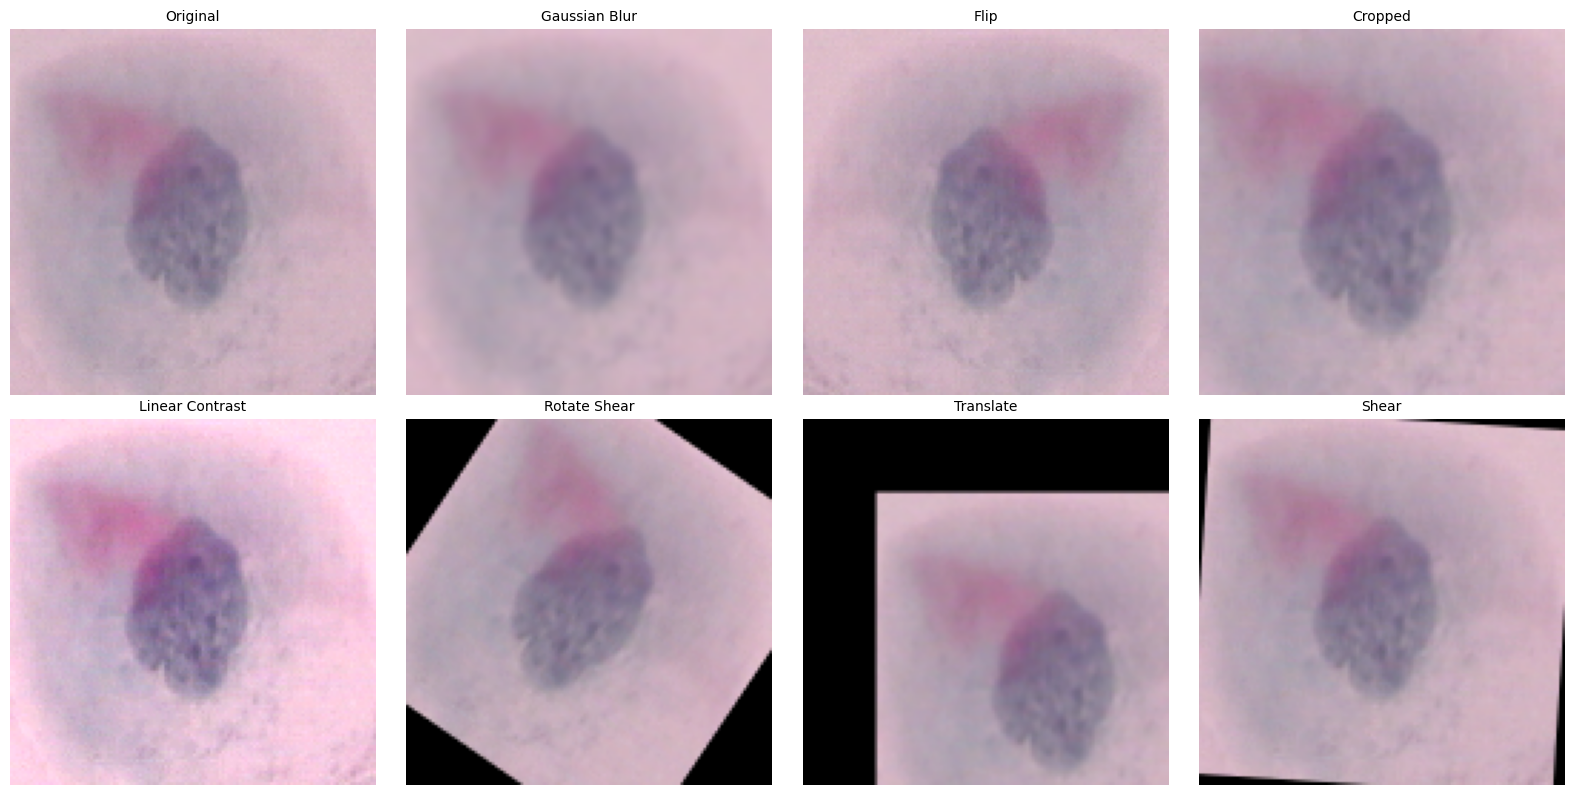

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import cv2
from imgaug import augmenters as iaa
import os

# Define custom augmentations
def augmentations_pipeline(image):
    augmented_images = {}

    # 1. Original Image
    augmented_images["Original"] = image

    # 2. Gaussian Blur
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    augmented_images["Gaussian Blur"] = blurred

    # 3. Flip (Horizontal Flip)
    flipped = cv2.flip(image, 1)
    augmented_images["Flip"] = flipped

    # 4. Cropped (Center Crop)
    height, width = image.shape[:2]
    cropped = image[int(0.1 * height):int(0.9 * height), int(0.1 * width):int(0.9 * width)]
    cropped = cv2.resize(cropped, (width, height))  # Resize back to original size
    augmented_images["Cropped"] = cropped

    # 5. Linear Contrast
    contrast = iaa.LinearContrast((1.5))  # Increase contrast
    contrasted = contrast.augment_image(image)
    augmented_images["Linear Contrast"] = contrasted

    # 6. Rotate Shear
    rotate_shear = iaa.Affine(rotate=(-25, 25), shear=(-15, 15))
    rotated_sheared = rotate_shear.augment_image(image)
    augmented_images["Rotate Shear"] = rotated_sheared

    # 7. Translate
    translate = iaa.Affine(translate_percent={"x": 0.2, "y": 0.2})
    translated = translate.augment_image(image)
    augmented_images["Translate"] = translated

    # 8. Shear
    shear = iaa.Affine(shear=(-20, 20))
    sheared = shear.augment_image(image)
    augmented_images["Shear"] = sheared

    return augmented_images

# Display the augmentations
def display_augmentations(data_dir, image_filename):
    # Load the original image
    image_path = os.path.join(data_dir, image_filename)  # Correctly join the path
    print(f"Loading image from: {image_path}")  # Debugging line to verify the path
    
    try:
        original_image = load_img(image_path, target_size=(128, 128))
        original_image = img_to_array(original_image).astype(np.uint8)
    except Exception as e:
        print(f"Error loading image: {e}")
        return

    # Apply augmentations
    augmented_images = augmentations_pipeline(original_image)

    # Plot augmented images
    fig, axes = plt.subplots(2, 4, figsize=(16, 8))
    axes = axes.flatten()
    for ax, (aug_name, aug_image) in zip(axes, augmented_images.items()):
        ax.imshow(aug_image)
        ax.axis('off')
        ax.set_title(aug_name, fontsize=10)
    plt.tight_layout()
    plt.show()

# Replace 'data_dir' with your dataset directory and provide a sample image name
display_augmentations("D:/DataSet/Herlev Dataset/train/light_dysplastic", "148494967-148494986-001.BMP")  # Update path with the correct filename


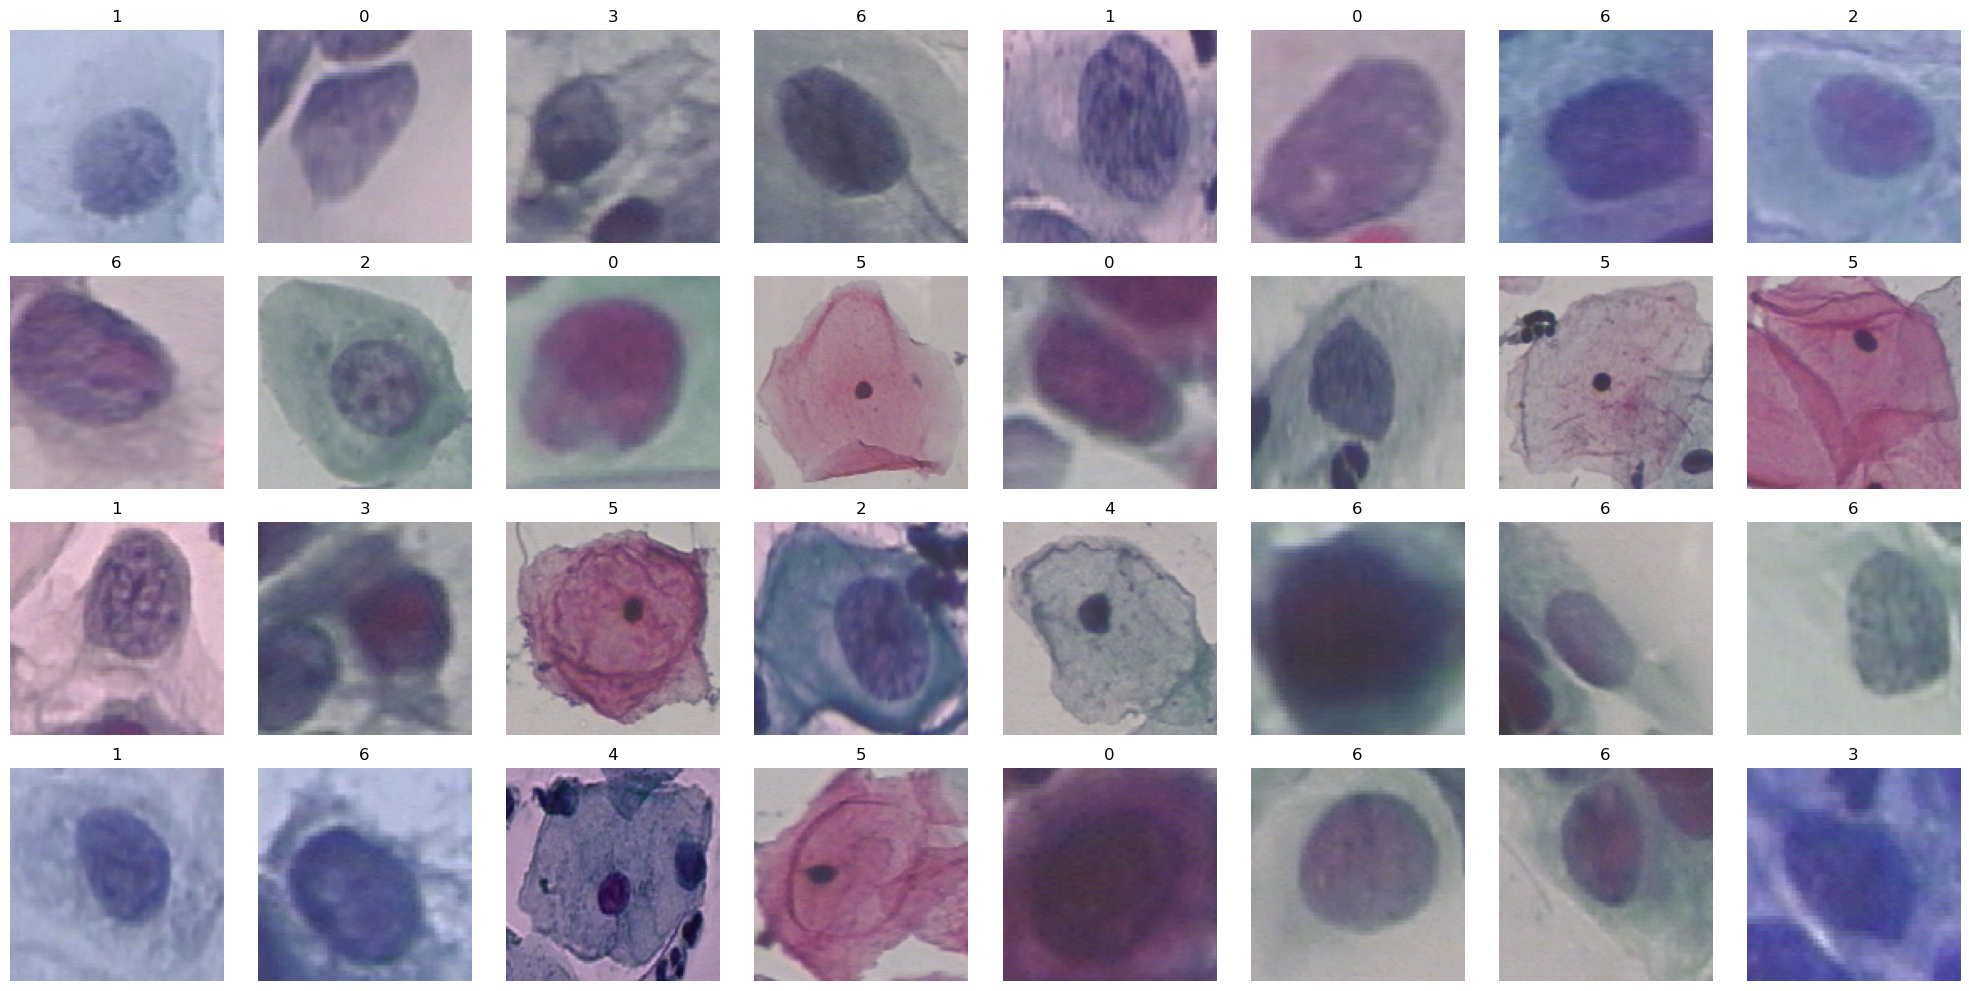

In [32]:
images, labels = next(train_generator)

def plot_images(images_arr, labels_arr):
    fig, axes = plt.subplots(4, 8, figsize=(20, 10))
    axes = axes.flatten()
    for img, lbl, ax in zip(images_arr, labels_arr, axes):
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(np.argmax(lbl))
    plt.tight_layout()
    plt.show()

plot_images(images, labels)

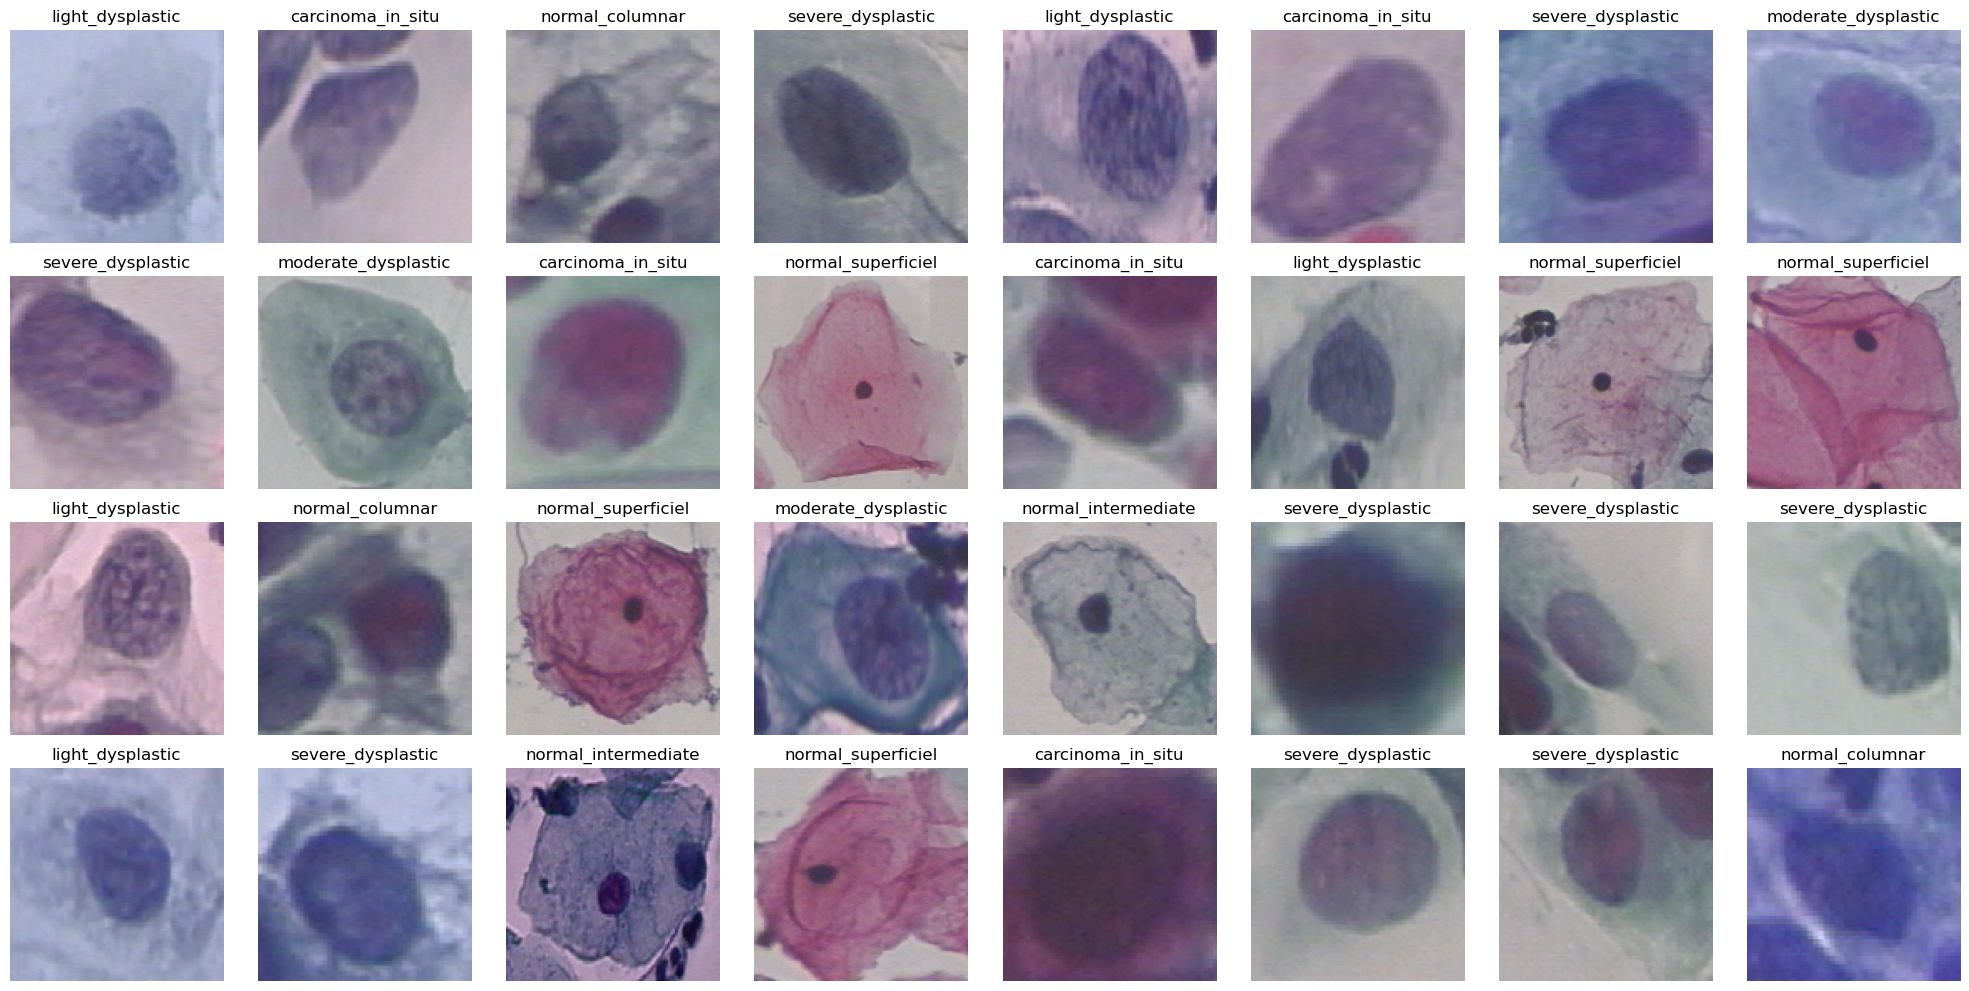

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Define label mapping
label_mapping = {0: "carcinoma_in_situ", 1: "light_dysplastic", 2: "moderate_dysplastic", 3: "normal_columnar",4:"normal_intermediate",5:"normal_superficiel",
                6:"severe_dysplastic"}
def plot_images(images_arr, labels_arr):
    fig, axes = plt.subplots(4, 8, figsize=(20, 10))
    axes = axes.flatten()
    for img, lbl, ax in zip(images_arr, labels_arr, axes):
        ax.imshow(img)
        ax.axis('off')
        # Get the label name using the mapping dictionary
        ax.set_title(label_mapping[np.argmax(lbl)])
    plt.tight_layout()
    plt.show()

# Call the function
plot_images(images, labels)


In [11]:
import tensorflow as tf
from tensorflow.keras.layers import (
    Input,
    Conv2D,
    MaxPooling2D,
    Dropout,
    Concatenate,
    GlobalAveragePooling2D,
    BatchNormalization,
    Activation,
    Flatten,
    Dense
)

In [13]:
from tensorflow.keras.models import Model


def fire_module(x, squeeze_filters, expand_filters):
    """
    A Fire module with squeeze and expand operations.

    Args:
        x: Input tensor.
        squeeze_filters: Number of filters for the squeeze layer.
        expand_filters: Number of filters for the expand layer.

    Returns:
        Output tensor after the fire module.
    """
    # Squeeze operation
    squeeze = Conv2D(squeeze_filters, (1, 1), activation='relu', padding='valid')(x)
    squeeze = BatchNormalization()(squeeze)

    # Expand operation
    expand_1x1 = Conv2D(expand_filters, (1, 1), activation='relu', padding='valid')(squeeze)
    expand_3x3 = Conv2D(expand_filters, (3, 3), activation='relu', padding='same')(squeeze)

    # Concatenate the 1x1 and 3x3 expansions
    output = Concatenate()([expand_1x1, expand_3x3])
    output = BatchNormalization()(output)

    return output

In [15]:
def build_improved_squeezenet(input_shape=(128, 128, 3), num_classes=7):
    """
    Builds the Improved SqueezeNet model.

    Args:
        input_shape: Shape of the input images (default is (128, 128, 3)).
        num_classes: Number of output classes.

    Returns:
        A compiled SqueezeNet model.
    """
    input_layer = Input(shape=input_shape)

    # Initial convolutional layer
    x = Conv2D(96, (3, 3), strides=(2, 2), activation='relu', padding='same')(input_layer)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)

    # Fire modules
    x = fire_module(x, squeeze_filters=16, expand_filters=64)
    x = fire_module(x, squeeze_filters=16, expand_filters=64)
    x = fire_module(x, squeeze_filters=32, expand_filters=128)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)

    x = fire_module(x, squeeze_filters=32, expand_filters=128)
    x = fire_module(x, squeeze_filters=48, expand_filters=192)
    x = fire_module(x, squeeze_filters=48, expand_filters=192)
    x = fire_module(x, squeeze_filters=64, expand_filters=256)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)

    x = fire_module(x, squeeze_filters=64, expand_filters=256)
    x = Dropout(0.5)(x)  # Regularization

    # Output layers
    x = Conv2D(num_classes, (1, 1), activation='relu', padding='valid')(x)
    x = BatchNormalization()(x)
    x = GlobalAveragePooling2D()(x)
    output_layer = Activation('softmax')(x)

    # Create the model
    model = Model(inputs=input_layer, outputs=output_layer)

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model



In [17]:
# Example usage
if __name__ == "__main__":
    # Define model
    model = build_improved_squeezenet(input_shape=(128, 128, 3), num_classes=7)

    # Display model architecture
    model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 128, 128, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 64, 64, 96)        │           2,688 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization           │ (None, 64, 64, 96)        │             384 │ conv2d[0][0]               │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 32, 32, 96)        │               0 │ batch_normalization[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_1 (Conv2D)             │ (None, 32, 32, 16)        │           1,552 │ max_pooling2d[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_1         │ (None, 32, 32, 16)        │              64 │ conv2d_1[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_2 (Conv2D)             │ (None, 32, 32, 64)        │           1,088 │ batch_normalization_1[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_3 (Conv2D)             │ (None, 32, 32, 64)        │           9,280 │ batch_normalization_1[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate (Concatenate)     │ (None, 32, 32, 128)       │               0 │ conv2d_2[0][0],            │
│                               │                           │                 │ conv2d_3[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_2         │ (None, 32, 32, 128)       │             512 │ concatenate[0][0]          │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_4 (Conv2D)             │ (None, 32, 32, 16)        │           2,064 │ batch_normalization_2[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_3         │ (None, 32, 32, 16)        │              64 │ conv2d_4[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_5 (Conv2D)             │ (None, 32, 32, 64)        │           1,088 │ batch_normalization_3[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_6 (Conv2D)             │ (None, 32, 32, 64)        │           9,280 │ batch_normalization_3[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate_1 (Concatenate)   │ (None, 32, 32, 128)       │               

 Total params: 739,427 (2.82 MB)

 Trainable params: 733,461 (2.80 MB)

 Non-trainable params: 5,966 (23.30 KB)

In [19]:
from tensorflow.keras.optimizers import Optimizer
import tensorflow as tf

class GazelleOptimizer(Optimizer):
    def __init__(self, learning_rate=0.001, beta=0.9, name="GazelleOptimizer", **kwargs):
        # Pass learning_rate as the first argument to the parent constructor
        super().__init__(learning_rate=learning_rate, name=name, **kwargs)

        # Store other parameters
        self.learning_rate = learning_rate
        self.beta = beta

    def apply_gradients(self, grads_and_vars, name=None, experimental_aggregate_gradients=True):
        # Custom gradient application logic
        pass

    def get_config(self):
        # Configuration for saving/loading the optimizer
        config = {
            'learning_rate': self.learning_rate,
            'beta': self.beta
        }
        base_config = super(GazelleOptimizer, self).get_config()
        return {**base_config, **config}


In [21]:
gazelle_optimizer = GazelleOptimizer(learning_rate=0.001, beta=0.9)
model.compile(optimizer=gazelle_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [23]:
def apply_gradients(self, grads_and_vars, name=None, experimental_aggregate_gradients=True):
    # Example: Apply gradient updates based on custom logic.
    # grads_and_vars is a list of (gradient, variable) pairs
    for grad, var in grads_and_vars:
        # Custom logic to apply gradients, e.g., using beta, learning_rate, etc.
        new_grad = grad * self.learning_rate  # Modify this logic as needed
        # Apply the updated gradient to the variable
        var.assign_sub(new_grad)  # Apply update (could be gradient descent or other methods)


In [40]:
# Build and compile the model
model_squeezenet = build_improved_squeezenet(input_shape=(128, 128, 3), num_classes=7)
model_squeezenet.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [52]:
from tensorflow.keras.callbacks import TensorBoard

tensorboard_callback = TensorBoard(log_dir='./logs', histogram_freq=1)
history_squeezenet = model_squeezenet.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
    callbacks=[tensorboard_callback]
)

Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.6330 - loss: 1.0369 - val_accuracy: 0.1680 - val_loss: 2.7301
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.7709 - loss: 0.8787 - val_accuracy: 0.1680 - val_loss: 2.6342
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.7184 - loss: 0.9184 - val_accuracy: 0.1680 - val_loss: 2.6527
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.6349 - loss: 1.1101 - val_accuracy: 0.1680 - val_loss: 2.6636
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.7127 - loss: 0.8900 - val_accuracy: 0.1680 - val_loss: 3.2928
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.7232 - loss: 0.8961 - val_accuracy: 0.1680 - val_loss: 3.4276
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.7140 - loss: 0.9399 - val_accuracy: 0.2480 - val_loss: 2.2194
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.7494 - loss: 0.8238 - val_accuracy: 0.1680 - val_loss:

In [53]:
print(history_squeezenet.history)


{'accuracy': [0.7084941864013672, 0.7355212569236755, 0.7104247212409973, 0.6563706398010254, 0.7142857313156128, 0.7084941864013672, 0.700772225856781, 0.7316602468490601, 0.6737451553344727, 0.7432432174682617, 0.7335907220840454, 0.7895752787590027, 0.7413127422332764, 0.7915058135986328, 0.7934362888336182, 0.7837837934494019, 0.7953668236732483, 0.8050193190574646, 0.8243243098258972, 0.8262548446655273, 0.8416988253593445, 0.799227774143219, 0.8127413392066956, 0.8127413392066956, 0.8011583089828491, 0.8088803291320801, 0.8494208455085754, 0.837837815284729, 0.8590733408927917, 0.8725868463516235, 0.8474903702735901, 0.8880308866500854, 0.8706563711166382, 0.8725868463516235, 0.8957529067993164, 0.8745173811912537, 0.8976833820343018, 0.8648648858070374, 0.8397683501243591, 0.8687258958816528, 0.8783783912658691, 0.9034749269485474, 0.9208494424819946, 0.9362934231758118, 0.9459459185600281, 0.92277991771698, 0.9285714030265808, 0.9169884324073792, 0.8938223719596863, 0.901544392

Text(0, 0.5, 'Accuracy')

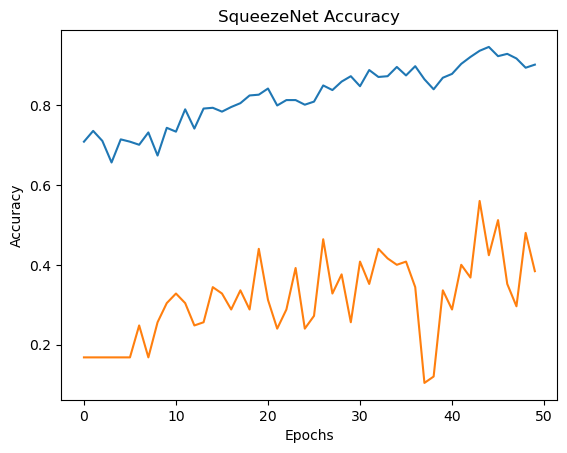

In [65]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history_squeezenet.history['accuracy'], label='Training Accuracy')
plt.plot(history_squeezenet.history['val_accuracy'], label='Validation Accuracy')
plt.title('SqueezeNet Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')




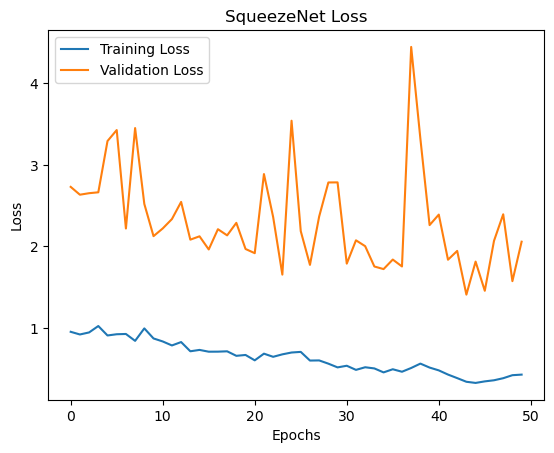

In [67]:

# Plot training and validation loss
plt.plot(history_squeezenet.history['loss'], label='Training Loss')
plt.plot(history_squeezenet.history['val_loss'], label='Validation Loss')
plt.title('SqueezeNet Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show() 

In [55]:
def evaluate_model(model, generator):
    y_true = generator.classes
    y_pred = model.predict(generator)
    y_pred_classes = np.argmax(y_pred, axis=1)

    cm = confusion_matrix(y_true, y_pred_classes)
    cr = classification_report(y_true, y_pred_classes, target_names=generator.class_indices.keys())

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=generator.class_indices.keys(), yticklabels=generator.class_indices.keys())
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    print('Classification Report:')
    print(cr)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 286ms/step


C:\Users\SATWIK\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SATWIK\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SATWIK\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


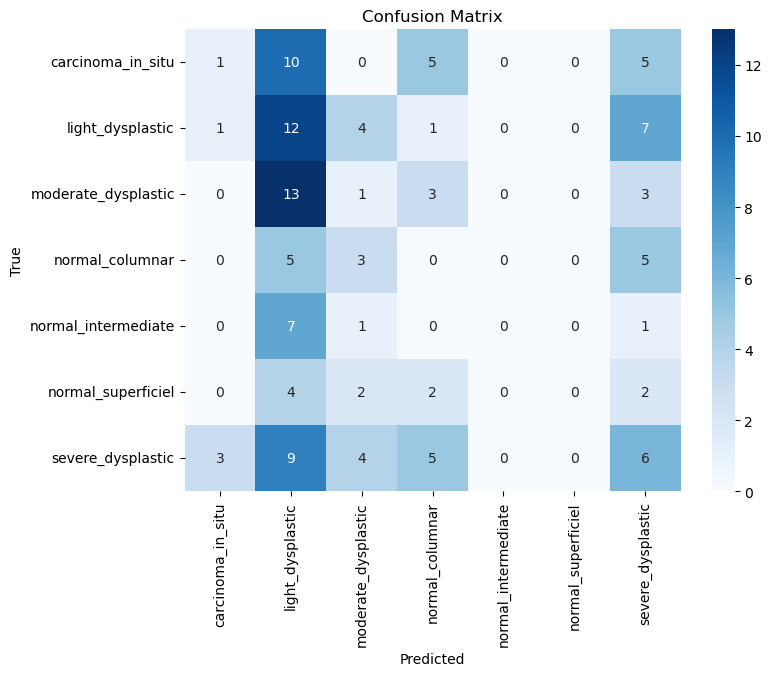

Classification Report:
                     precision    recall  f1-score   support

  carcinoma_in_situ       0.20      0.05      0.08        21
   light_dysplastic       0.20      0.48      0.28        25
moderate_dysplastic       0.07      0.05      0.06        20
    normal_columnar       0.00      0.00      0.00        13
normal_intermediate       0.00      0.00      0.00         9
 normal_superficiel       0.00      0.00      0.00        10
  severe_dysplastic       0.21      0.22      0.21        27

           accuracy                           0.16       125
          macro avg       0.10      0.11      0.09       125
       weighted avg       0.13      0.16      0.12       125



In [56]:
evaluate_model(model_squeezenet, val_generator)